In [11]:
import requests
from bs4 import BeautifulSoup
import re

# URL của API để lấy nội dung
api_url = "https://s.cafef.vn/Ajax/CongTy/ThongTinChung.aspx?sym=FPT"

# Gửi yêu cầu HTTP GET đến API và lấy nội dung
response = requests.get(api_url)

# Kiểm tra trạng thái của yêu cầu
if response.status_code == 200:
    # Sử dụng BeautifulSoup để phân tích cú pháp HTML
    soup = BeautifulSoup(response.content, "html.parser")

    # Tìm phần tử div theo id
    div_content = soup.find("div", id="companyinfo")

    if div_content:
        # Lấy nội dung chính của div
        main_content = div_content.text.strip()

        # Loại bỏ các thẻ HTML và CSS bằng cách thay thế chúng bằng chuỗi trống
        main_content = re.sub(r"<.*?>", "", main_content)

        # Lưu nội dung vào file văn bản (txt)
        with open("fpt.txt", "w", encoding="utf-8") as txt_file:
            txt_file.write(main_content)

        print("Nội dung đã được lưu vào file fpt.txt")
    else:
        print("Không tìm thấy div với id 'companyinfo'")
else:
    print("Lỗi khi gửi yêu cầu")


Nội dung đã được lưu vào file fpt.txt


code craw thông tin doanh nghiệp


In [2]:
import requests
from bs4 import BeautifulSoup
import re

# URL của API để lấy nội dung
api_url = "https://s.cafef.vn/Ajax/CongTy/ThongTinChung.aspx?sym=VIC"

# Gửi yêu cầu HTTP GET đến API và lấy nội dung
response = requests.get(api_url)

# Kiểm tra trạng thái của yêu cầu
if response.status_code == 200:
    # Sử dụng BeautifulSoup để phân tích cú pháp HTML
    soup = BeautifulSoup(response.content, "html.parser")

    # Tìm phần tử div theo id
    div_content = soup.find("div", id="companyinfo")

    if div_content:
        # Lấy nội dung chính của div
        main_content = div_content.text.strip()

        # Loại bỏ các thẻ HTML và CSS bằng cách thay thế chúng bằng chuỗi trống
        main_content = re.sub(r"<.*?>", "", main_content)

        # Lưu nội dung vào file văn bản (txt)
        with open("vic.txt", "w", encoding="utf-8") as txt_file:
            txt_file.write(main_content)

        print("Nội dung đã được lưu vào file vic.txt")
    else:
        print("Không tìm thấy div với id 'companyinfo'")
else:
    print("Lỗi khi gửi yêu cầu")


Nội dung đã được lưu vào file vic.txt


code craw thông tin ban lãnh đạo doanh nghiệp


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của trang web cần crawl
url = "https://s.cafef.vn/Ajax/CongTy/BanLanhDao.aspx?sym=FPT"

# Gửi yêu cầu GET đến URL và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, "html.parser")

# Tìm thẻ div có id là "divViewBanLanhDao"
div_ban_lanh_dao = soup.find("div", {"id": "divViewBanLanhDao"})

# Tạo danh sách lưu trữ kết quả
results = []

# Tìm tất cả các bảng trong thẻ div
tables = div_ban_lanh_dao.find_all("table")

# Vòng lặp qua từng bảng
for table in tables:
    # Tìm tất cả các dòng trong bảng
    rows = table.find_all("tr")

    # Vòng lặp qua từng dòng
    for row in rows:
        # Tìm tất cả các ô trong dòng
        cells = row.find_all("td")

        # Loại bỏ các dòng có số lượng ô lớn hơn 5
        if len(cells) > 5:
            continue

        # Lấy nội dung của các ô và thêm vào danh sách kết quả
        row_data = [cell.get_text(strip=True) for cell in cells]
        results.append(row_data)

# Kiểm tra xem danh sách kết quả có dữ liệu hay không
if len(results) > 0:
    # Tạo DataFrame từ danh sách kết quả
    df = pd.DataFrame(results)

    # Lưu DataFrame vào file CSV
    df.to_csv("ban_lanh_dao.csv", index=False)

    print("Dữ liệu đã được lưu vào file ban_lanh_dao.csv")
else:
    print("Không tìm thấy dữ liệu để lưu")


Dữ liệu đã được lưu vào file ban_lanh_dao.csv


Code craw thông tin các công ty con liên kết



In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của trang web cần crawl
url = "https://s.cafef.vn/Ajax/CongTy/CongTyCon.aspx?sym=FPT"

# Gửi yêu cầu GET đến URL và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, "html.parser")

# Tìm thẻ <tr> bên trong thẻ <table> và lấy thông tin từ các thẻ con
tables = soup.find_all('table', {'class': 'congtycon'})

data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]
        data.append(row_data)

# Lưu dữ liệu vào file CSV sử dụng pandas
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False, header=False, encoding='utf-8')
print('Đã lưu dữ liệu vào file data.csv')


Đã lưu dữ liệu vào file data.csv


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL của trang web cần crawl
url = "https://s.cafef.vn/Ajax/CongTy/CongTyCon.aspx?sym=VIC"

# Gửi yêu cầu GET đến URL và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, "html.parser")

# Tìm thẻ <tr> bên trong thẻ <table> và lấy thông tin từ các thẻ con
tables = soup.find_all('table', {'class': 'congtycon'})

data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]
        data.append(row_data)

# Lưu dữ liệu vào file CSV sử dụng pandas
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False, header=False, encoding='utf-8')
print('Đã lưu dữ liệu vào file data.csv')


Đã lưu dữ liệu vào file data.csv


CODE CRAWL DỮ LIỆU CÁC LOẠI BIỂU ĐỒ THỐNG KÊ CỦA DOANH NGHIỆP


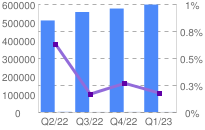

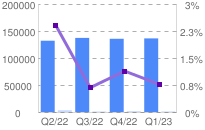

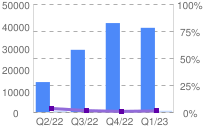

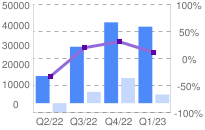

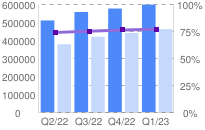

In [12]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

# URL của trang web cần crawl
url = "https://s.cafef.vn/hose/VIC-tap-doan-vingroup-cong-ty-co-phan.chn"  # Thay thế URL thật của bạn

# Gửi yêu cầu GET đến URL và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, "html.parser")

# Tìm tất cả các thẻ <img> trong thẻ <div id="divChartBCTC"> và lấy URL của ảnh
div_chart_bctc = soup.find('div', {'id': 'divChartBCTC'})
img_tags = div_chart_bctc.find_all('img')
img_urls = [img['src'] for img in img_tags]

# Crawl và hiển thị các ảnh
for img_url in img_urls:
    img_response = requests.get(img_url)
    img_data = img_response.content
    image = Image.open(BytesIO(img_data))
    image.show()


In [15]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# URL của trang web cần crawl
url = "https://s.cafef.vn/hose/VIC-tap-doan-vingroup-cong-ty-co-phan.chn"  # Thay thế URL thật của bạn

# Gửi yêu cầu GET đến URL và lấy nội dung HTML
response = requests.get(url)
html_content = response.text

# Sử dụng BeautifulSoup để phân tích cú pháp HTML
soup = BeautifulSoup(html_content, "html.parser")

# Tìm tất cả các thẻ <img> trong thẻ <div id="divChartBCTC"> và lấy URL và chú thích của ảnh
div_chart_bctc = soup.find('div', {'id': 'divChartBCTC'})
img_tags = div_chart_bctc.find_all('img')
img_info = []

for img in img_tags:
    img_url = img['src']
    img_class = img.get('class', [''])[0]
    img_id = img.get('id', '')

    # Lấy chú thích từ thẻ cha của ảnh
    parent_div = img.find_parent('div')
    legend_divs = parent_div.find_all('div', {'class': 'dltlonote'})
    captions = [legend.get_text().strip() for legend in legend_divs]

    img_info.append({
        'url': img_url,
        'class': img_class,
        'id': img_id,
        'captions': captions
    })

# Tạo HTML để hiển thị các ảnh theo yêu cầu
html = "<div style='display: flex; justify-content: space-between;'>"

for img in img_info:
    img_url = img['url']
    img_response = requests.get(img_url)
    img_data = img_response.content

    # Tạo thẻ <div> chứa ảnh và chú thích
    div_html = f"<div style='text-align: center;'>"
    div_html += f"<img src='{img_url}' style='max-width: 400px;'>"
    div_html += "<br>"
    for caption in img['captions']:
        div_html += f"<p>{caption}</p>"
    div_html += "</div>"

    # Thêm thẻ <div> vào HTML chính
    html += div_html

html += "</div>"

# Hiển thị HTML
display(HTML(html))


FULL CODE CRAL THÔNG TIN DOANH NGHIEP CONG TY CON BAN LANH DAO


In [22]:
import os
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Tạo thư mục "FPT" nếu chưa tồn tại
symboy = "FPT"
folder_path = "{}".format(symboy)
os.makedirs(folder_path, exist_ok=True)

# Lấy nội dung của trang thông tin chung
api_url = "https://s.cafef.vn/Ajax/CongTy/ThongTinChung.aspx?sym={}".format(symboy)
response = requests.get(api_url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    div_content = soup.find("div", id="companyinfo")
    if div_content:
        main_content = div_content.text.strip()
        main_content = re.sub(r"<.*?>", "", main_content)
        with open(os.path.join(folder_path, "thong_tin_chung.txt"), "w", encoding="utf-8") as txt_file:
            txt_file.write(main_content)
        print("Đã lưu nội dung của trang thông tin chung vào file thong_tin_chung.txt")
    else:
        print("Không tìm thấy div với id 'companyinfo'")
else:
    print("Lỗi khi gửi yêu cầu")

# Lấy dữ liệu từ trang Ban Lãnh đạo
ban_lanh_dao_url = "https://s.cafef.vn/Ajax/CongTy/BanLanhDao.aspx?sym={}".format{symboy}
response = requests.get(ban_lanh_dao_url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")
div_ban_lanh_dao = soup.find("div", id="divViewBanLanhDao")
results = []
if div_ban_lanh_dao:
    tables = div_ban_lanh_dao.find_all("table")
    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            if len(cells) > 5:
                continue
            row_data = [cell.get_text(strip=True) for cell in cells]
            results.append(row_data)
    if len(results) > 0:
        df = pd.DataFrame(results)
        df.to_csv(os.path.join(folder_path, "ban_lanh_dao.csv"), index=False)
        print("Đã lưu dữ liệu từ trang Ban Lãnh đạo vào file ban_lanh_dao.csv")
    else:
        print("Không tìm thấy dữ liệu để lưu")
else:
    print("Không tìm thấy div với id 'divViewBanLanhDao'")

# Lấy dữ liệu từ trang Công ty con
cong_ty_con_url = "https://s.cafef.vn/Ajax/CongTy/CongTyCon.aspx?sym={}".format(symboy)
response = requests.get(cong_ty_con_url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")
tables = soup.find_all('table', {'class': 'congtycon'})
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]
        data.append(row_data)
if len(data) > 0:
    df = pd.DataFrame(data)
    df.to_csv(os.path.join(folder_path, "cong_ty_con.csv"), index=False, header=False, encoding='utf-8')
    print("Đã lưu dữ liệu từ trang Công ty con vào file cong_ty_con.csv")
else:
    print("Không tìm thấy dữ liệu để lưu")


Đã lưu nội dung của trang thông tin chung vào file thong_tin_chung.txt
Đã lưu dữ liệu từ trang Ban Lãnh đạo vào file ban_lanh_dao.csv
Đã lưu dữ liệu từ trang Công ty con vào file cong_ty_con.csv


In [25]:
import os
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Tạo thư mục "FPT" nếu chưa tồn tại
symboy = "FPT"
folder_path = "{}".format(symboy)
os.makedirs(folder_path, exist_ok=True)

# Lấy nội dung của trang thông tin chung
api_url = "https://s.cafef.vn/Ajax/CongTy/ThongTinChung.aspx?sym={}".format(symboy)
response = requests.get(api_url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    div_content = soup.find("div", id="companyinfo")
    if div_content:
        main_content = div_content.text.strip()
        main_content = re.sub(r"<.*?>", "", main_content)
        with open(os.path.join(folder_path, "thong_tin_chung.txt"), "w", encoding="utf-8") as txt_file:
            txt_file.write(main_content)
        print("Đã lưu nội dung của trang thông tin chung vào file thong_tin_chung.txt")
    else:
        print("Không tìm thấy div với id 'companyinfo'")
else:
    print("Lỗi khi gửi yêu cầu")

# Lấy dữ liệu từ trang Ban Lãnh đạo
ban_lanh_dao_url = "https://s.cafef.vn/Ajax/CongTy/BanLanhDao.aspx?sym={}".format(symboy)
response = requests.get(ban_lanh_dao_url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")
div_ban_lanh_dao = soup.find("div", id="divViewBanLanhDao")
results = []
if div_ban_lanh_dao:
    tables = div_ban_lanh_dao.find_all("table")
    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            if len(cells) > 5:
                continue
            row_data = [cell.get_text(strip=True) for cell in cells]
            results.append(row_data)
    if len(results) > 0:
        df = pd.DataFrame(results)
        df.to_csv(os.path.join(folder_path, "ban_lanh_dao.csv"), index=False)
        print("Đã lưu dữ liệu từ trang Ban Lãnh đạo vào file ban_lanh_dao.csv")
    else:
        print("Không tìm thấy dữ liệu để lưu")
else:
    print("Không tìm thấy div với id 'divViewBanLanhDao'")

# Lấy dữ liệu từ trang Công ty con
cong_ty_con_url = "https://s.cafef.vn/Ajax/CongTy/CongTyCon.aspx?sym={}".format(symboy)
response = requests.get(cong_ty_con_url)
html_content = response.text
soup = BeautifulSoup(html_content, "html.parser")
tables = soup.find_all('table', {'class': 'congtycon'})
data = []
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        cells = row.find_all('td')
        row_data = [cell.get_text(strip=True) for cell in cells]
        data.append(row_data)
if len(data) > 0:
    df = pd.DataFrame(data)
    df.to_csv(os.path.join(folder_path, "cong_ty_con.csv"), index=False, header=False, encoding='utf-8')
    print("Đã lưu dữ liệu từ trang Công ty con vào file cong_ty_con.csv")
else:
    print("Không tìm thấy dữ liệu để lưu")


Đã lưu nội dung của trang thông tin chung vào file thong_tin_chung.txt
Đã lưu dữ liệu từ trang Ban Lãnh đạo vào file ban_lanh_dao.csv
Đã lưu dữ liệu từ trang Công ty con vào file cong_ty_con.csv


In [ ]:
import os
import json
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Đường dẫn tới file JSON
json_file_path = "/content/drive/MyDrive/Bigdata_Project/Data_InforBasic_day/jsonDataListSympoy.json"

# Đường dẫn thư mục chứa dữ liệu kết quả
result_folder_path = "/content/drive/MyDrive/Bigdata_Project/Data_ThongTinDoanhNghiep"

# Đọc dữ liệu từ file JSON
with open(json_file_path, "r") as json_file:
    json_data = json.load(json_file)

# Lặp qua từng đối tượng trong JSON
for data_object in json_data:
    symbol = data_object["Symbol"]

    # Tạo thư mục cho symbol nếu chưa tồn tại
    folder_path = os.path.join(result_folder_path, symbol)
    os.makedirs(folder_path, exist_ok=True)

    # Lấy nội dung của trang thông tin chung
    api_url = f"https://s.cafef.vn/Ajax/CongTy/ThongTinChung.aspx?sym={symbol}"
    response = requests.get(api_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        div_content = soup.find("div", id="companyinfo")
        if div_content:
            main_content = div_content.text.strip()
            main_content = re.sub(r"<.*?>", "", main_content)
            with open(os.path.join(folder_path, "{}_thong_tin_chung.txt".format(symbol)), "w", encoding="utf-8") as txt_file:
                txt_file.write(main_content)
            print(f"Đã lưu nội dung của trang thông tin chung vào file {symbol}/{symbol}_thong_tin_chung.txt")
        else:
            print(f"Không tìm thấy div với id 'companyinfo' cho Symbol: {symbol}")
    else:
        print(f"Lỗi khi gửi yêu cầu cho Symbol: {symbol}")

    # Lấy dữ liệu từ trang Ban Lãnh đạo
    ban_lanh_dao_url = f"https://s.cafef.vn/Ajax/CongTy/BanLanhDao.aspx?sym={symbol}"
    response = requests.get(ban_lanh_dao_url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    div_ban_lanh_dao = soup.find("div", id="divViewBanLanhDao")
    results = []
    if div_ban_lanh_dao:
        tables = div_ban_lanh_dao.find_all("table")
        for table in tables:
            rows = table.find_all("tr")
            for row in rows:
                cells = row.find_all("td")
                if len(cells) > 5:
                    continue
                row_data = [cell.get_text(strip=True) for cell in cells]
                results.append(row_data)
        if len(results) > 0:
            df = pd.DataFrame(results)
            df.to_csv(os.path.join(folder_path, "{}_ban_lanh_dao.csv".format(symbol)), index=False)
            print(f"Đã lưu dữ liệu từ trang Ban Lãnh đạo vào file {symbol}/ban_lanh_dao.csv")
        else:
            print(f"Không tìm thấy dữ liệu để lưu cho Symbol: {symbol}")
    else:
        print(f"Không tìm thấy div với id 'divViewBanLanhDao' cho Symbol: {symbol}")

    # Lấy dữ liệu từ trang Công ty con
    cong_ty_con_url = f"https://s.cafef.vn/Ajax/CongTy/CongTyCon.aspx?sym={symbol}"
    response = requests.get(cong_ty_con_url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    tables = soup.find_all('table', {'class': 'congtycon'})
    data = []
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            cells = row.find_all('td')
            row_data = [cell.get_text(strip=True) for cell in cells]
            data.append(row_data)
    if len(data) > 0:
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(folder_path, "{}_cong_ty_con_cong_ty_lien_ket.csv".format(symbol)), index=False, header=False, encoding='utf-8')
        print(f"Đã lưu dữ liệu từ trang Công ty con vào file {symbol}/cong_ty_con.csv")
    else:
        print(f"Không tìm thấy dữ liệu để lưu cho Symbol: {symbol}")
